<a id="3"></a>
<font color="blue" size=+2.5><b>2.1 Installation of Libraries </b></font>

## !pip install fastai

<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [ ]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from fastai.data.transforms import parent_label
from fastai.data.block import DataBlock, CategoryBlock
from fastai.data.transforms import get_image_files, RandomSplitter
from fastai.vision.augment import aug_transforms, Normalize, Resize
from fastai.vision.data import ImageBlock, ImageDataLoaders
from fastai.vision.augment import aug_transforms
from fastai.vision.all import cnn_learner, accuracy,models
from fastai.learner import load_learner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="5"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [ ]:
x  = '/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/train'
path = Path(x)
path.ls()

(#2) [Path('/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/train/benign'),Path('/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/train/malignant')]

In [ ]:
np.random.seed(40)
# data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
#                                   ds_tfms=get_transforms(), size=224,
#                                   num_workers=4).normalize(imagenet_stats)

imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)

<a id="9"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>


In [ ]:
dls = data.dataloaders(path)


n_out = dls.c

# learn = cnn_learner(dls, models.resnet18, metrics=[accuracy], model_dir=Path('/content/drive/MyDrive/NNcasestudy/resnet18-5c106cde.pth'), path=Path("."))



In [ ]:
learn = cnn_learner(dls, models.resnet18, metrics=[accuracy], model_dir=Path('/content/drive/MyDrive/NNcasestudy/model10/'),path=Path("."))


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

<a id="10"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

mv: cannot stat 'lr.json': No such file or directory


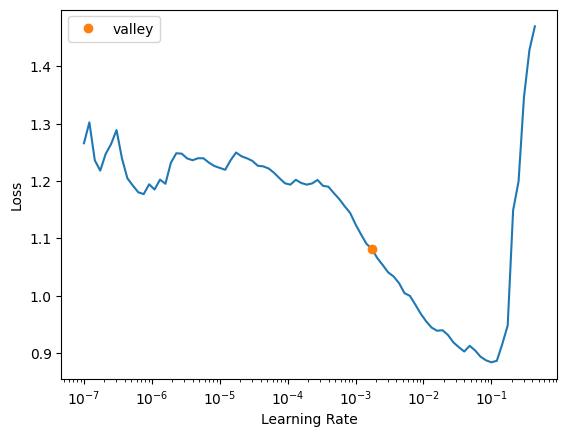

In [ ]:
import json
from fastai.learner import *


# Your LR value
learn.lr_find()

lr_value = learn.recorder.lrs[np.argmin(learn.recorder.losses)]

# Save it to a JSON file
lr_data = {"learning_rate": lr_value}
with open("lr1.json", "w") as json_file:
    json.dump(lr_data, json_file)

# Move the file to your Google Drive
!mv lr.json '/content/drive/MyDrive/NNcasestudy/'



<a id="11"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(20,slice(lr1,lr2))


epoch,train_loss,valid_loss,accuracy,time
0,0.534765,0.352354,0.867855,02:41
1,0.404536,0.300291,0.935464,01:11
2,0.291430,0.082964,0.964352,01:12
3,0.310908,0.582104,0.893669,01:10
4,0.590517,0.212825,0.947757,01:11
5,0.246768,0.057184,0.979103,01:10
6,0.315711,0.286565,0.943454,01:11
7,0.398256,0.661559,0.936079,01:10
8,0.339407,0.247680,0.954518,01:11
9,0.228735,0.048383,0.984634,01:13


<a id="12"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(15,slice(1e-4,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.037316,0.019952,0.993239,01:21
1,0.050320,0.069978,0.982176,01:14
2,0.057626,0.028686,0.988937,01:15
3,0.053755,0.063551,0.979103,01:13
4,0.052682,0.019790,0.993239,01:14
5,0.043570,0.018877,0.992010,01:15
6,0.039677,0.040727,0.986478,01:14
7,0.032393,0.032938,0.988322,01:14
8,0.028887,0.039052,0.986478,01:12
9,0.027856,0.318102,0.988937,01:14


In [ ]:
from fastai.learner import load_learner
model_path=Path('/content/drive/MyDrive/NNcasestudy/model10/trained_model')
# Load the model from Google Drive
learn = load_learner(model_path)

# **Prediction**

In [ ]:
# img = open_image('/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/val/benign/benign (1)-rotated1-rotated1.png')
# print(learn.predict(img)[0])


from PIL import Image
import numpy as np

# Define the path to your image
img_path = '/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/val/benign/benign (1)-rotated1-rotated1.png'

# Open and preprocess the image
img = Image.open(img_path)
img = img.resize((128, 128))  # Resize to match the input size of your model
img = img.convert('RGB')  # Ensure the image is in RGB format

# Convert the image to a NumPy array
img_array = np.array(img)  # This should automatically have a uint8 data type

# Use the learner/model to make a prediction on the image_array
prediction = learn.predict(img_array)

# Print the prediction
print(prediction)



('benign', tensor(0), tensor([1.0000e+00, 9.2330e-07]))


In [ ]:
# img = open_image('/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/val/malignant/malignant (1)-rotated1-rotated1-rotated1.png')
# print(learn.predict(img)[0])


from PIL import Image
import numpy as np

# Define the path to your image
img_path = '/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/val/malignant/malignant (1)-rotated1-rotated1-rotated1.png'

# Open and preprocess the image
img = Image.open(img_path)
img = img.resize((128, 128))# Resize to match the input size of your model
img = img.convert('RGB')  # Ensure the image is in RGB format

# Convert the image to a NumPy array
img_array = np.array(img)  # This should automatically have a uint8 data type

# Use the learner/model to make a prediction on the image_array
prediction = learn.predict(img_array)

# Print the prediction
print(prediction)

('malignant', tensor(1), tensor([4.2862e-04, 9.9957e-01]))


<a id="15"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>

In [ ]:
from fastai.vision.all import *

# Define the path to your dataset
path = Path('/content/drive/MyDrive/NNcasestudy/ultrasound breast classification/val')

# Define a DataBlock for your dataset
np.random.seed(40)
# data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
#                                   ds_tfms=get_transforms(), size=224,
#                                   num_workers=4).normalize(imagenet_stats)

imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)
# Create DataLoaders
dls = data.dataloaders(path)  # Adjust batch size as needed

# Calculate accuracy on the validation set and print it
accuracy_value = learn.validate(dl=dls.valid)[1]
print(f"Validation Accuracy: {accuracy_value * 100:.2f}%")





Validation Accuracy: 100.00%


In [ ]:

model_path = '/content/drive/MyDrive/NNcasestudy/model10/trained_model'

# Save the model
learn.export(model_path)


<a id="16"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>